## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 05 : Regresi dan Induksi Pohon Keputusan </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [1]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Obie Krisnanto"
myNIM = "00000054153"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Obie Krisnanto
NIM: 		00000054153
Start: 		2023-03-08 11:56:12.654809
Device ID: 	8c9d313a-bd6d-11ed-a67d-f40f241a7edd



---

### Dataset yang dipakai:

1. Microsoft Stock – sumber : https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis
2. Raisin Dataset – sumber : https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

### Hasil kerja

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Generate Data

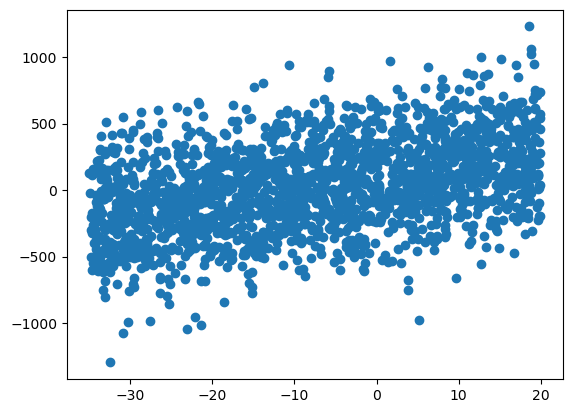

In [3]:
x = np.random.uniform(-35, 20, 2000)
y = 9 * x - 10 * np.random.normal(-10, 30, 2000)
plt.scatter(x, y)

### Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(x[:, np.newaxis], y)

LinearRegression()

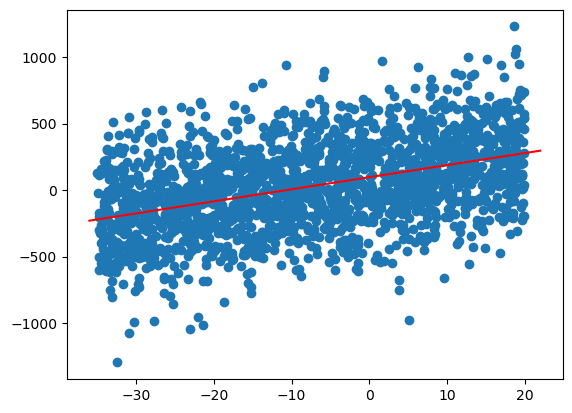

In [5]:
xfit = np.linspace(-36, 22)
yfit = lr.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit, color="red")

In [6]:
lr.coef_

array([9.08036187])

In [7]:
lr.intercept_

96.49937718118119

# Polynomial

### Polynomial model using PolynomialFeatures 

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 8.38318144e+00,  7.02777310e+01,  5.89150970e+02],
       [-8.57509675e+00,  7.35322843e+01, -6.30546453e+02],
       [-2.61098508e+01,  6.81724306e+02, -1.77997199e+04],
       ...,
       [-1.98653696e+01,  3.94632909e+02, -7.83952860e+03],
       [-1.74475907e+01,  3.04418423e+02, -5.31136806e+03],
       [-1.55916037e+01,  2.43098107e+02, -3.79028935e+03]])

### Polynomial model using make_pipeline

In [9]:
from sklearn.pipeline import make_pipeline
polymod = make_pipeline(PolynomialFeatures(7), LinearRegression())
x = 10 * np.random.RandomState(1).randn(2000)
y = np.sin(x) + 0.1 * np.random.RandomState(1).randn(2000)
polymod.fit(x[:, np.newaxis], y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

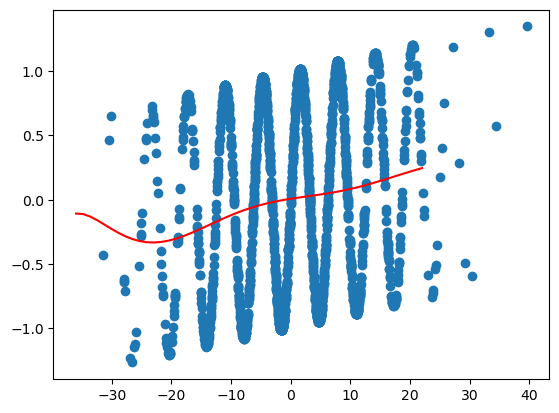

In [10]:
yfit = polymod.predict(xfit[:, np.newaxis])

plt.scatter(x,y )
plt.plot(xfit, yfit, color="red")

## Gaussian Basis Function

(0.0, 10.0)

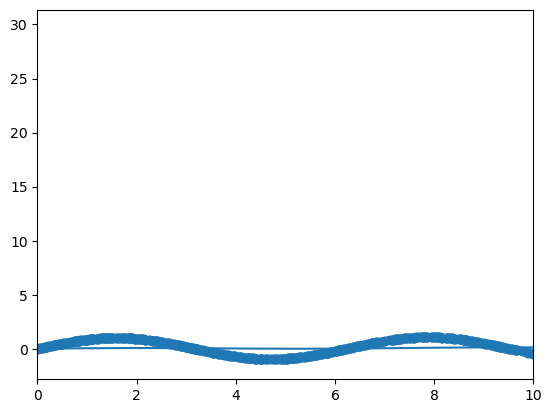

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):

    def __init__(self, N, width_factor = 2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x,y, width, axis =None):
        arg = (x-y) / width
        return np.exp(-0.5 * np.sum(arg**2, axis))
    
    def fit(self, X, y=None):
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0,10)



### Regularization

(-2.5, 2.5)

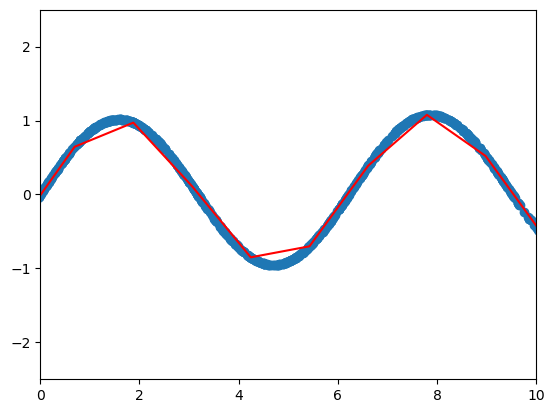

In [12]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]), c='red')
plt.xlim(0, 10)
plt.ylim(-2.5, 2.5)

### Gaussian Coeff Visualization

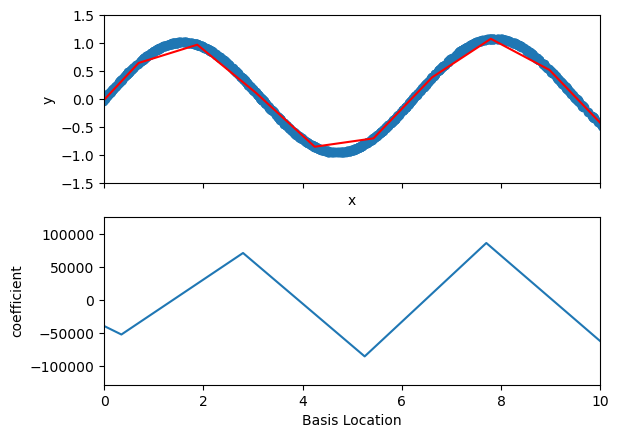

In [13]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]), c='red')
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))

    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='Basis Location', ylabel='coefficient', xlim=(0, 10))

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

### Ridge Regression

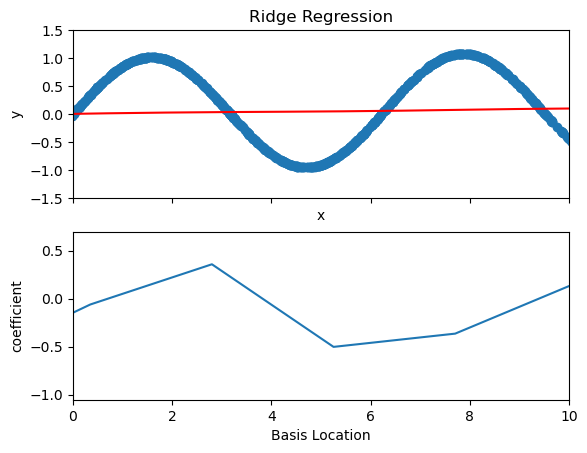

In [14]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

### Lasso Regression

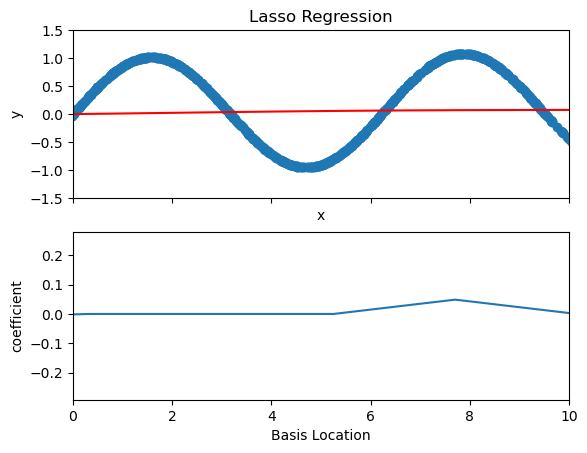

In [15]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

---
# Linear Regression

In [16]:
stock = pd.read_csv("Microsoft_Stock.csv")
stock.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


### Split data set

In [17]:
x = stock[["Open", "High", "Low", "Volume"]]
y = stock["Close"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)


In [18]:
model = LinearRegression(fit_intercept=False)
model.fit(x, y)
stock["Predicted"] = model.predict(x)

<AxesSubplot: >

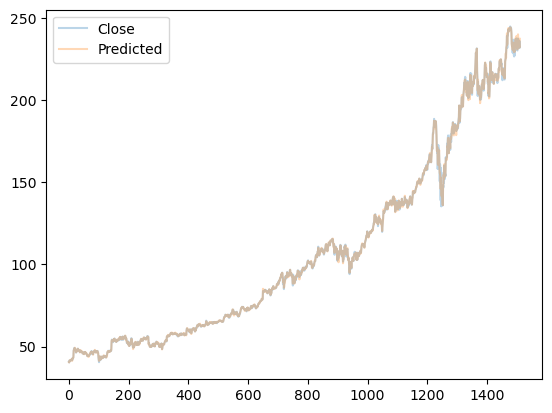

In [19]:
stock[["Close", "Predicted"]].plot(alpha=0.3)

In [20]:
params = pd.Series(model.coef_, index=x.columns)
params

Open     -5.827038e-01
High      7.528249e-01
Low       8.315454e-01
Volume   -1.132329e-09
dtype: float64

In [21]:
from sklearn.utils import resample

np.random.seed(1)
err = np.std([model.fit(*resample(x, y)).coef_ for _ in range(1000)], 0)
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

        effect  error
Open      -1.0    0.0
High       1.0    0.0
Low        1.0    0.0
Volume    -0.0    0.0


---
# Decision Tree

In [22]:
import mglearn
import graphviz

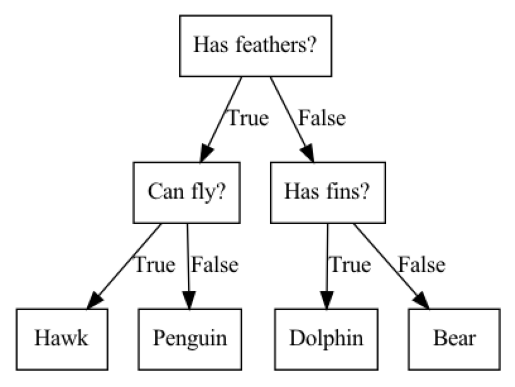

In [23]:
mglearn.plots.plot_animal_tree()

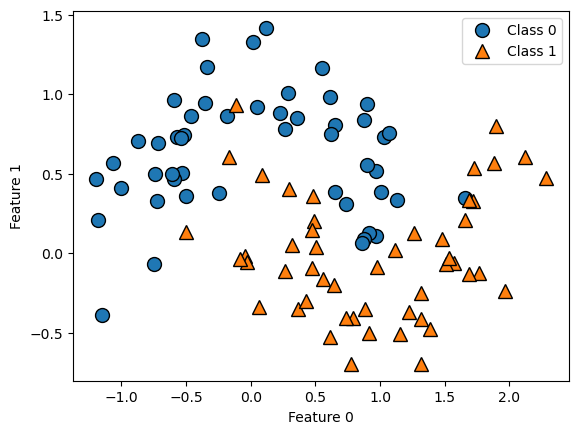

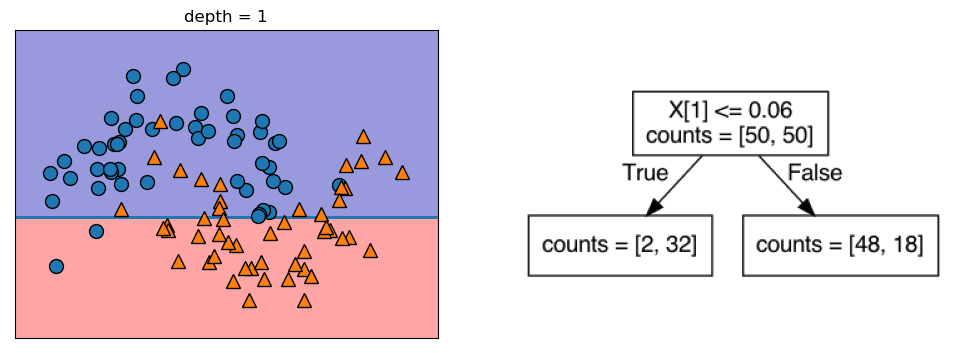

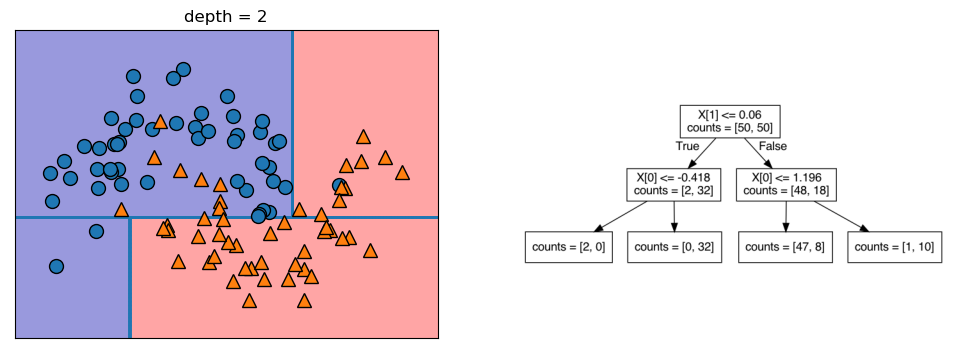

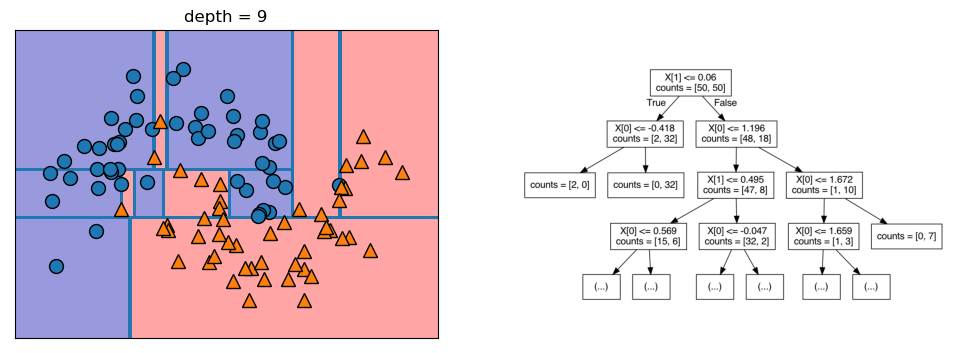

In [24]:
mglearn.plots.plot_tree_progressive()

---
### Read Excel

In [26]:
raisin = pd.read_excel("Raisin_Dataset.xlsx")
raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [27]:
raisin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [28]:
raisin["Class"].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

### Split Dataset

In [2]:
x = raisin.iloc[:, :-1]
y = raisin["Class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

NameError: name 'raisin' is not defined

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)

print("Accuracy on training set", tree.score(x_train, y_train))
print("Accuracy on test set", tree.score(x_test, y_test))

Accuracy on training set 1.0
Accuracy on test set 0.8044444444444444


In [31]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(x_train, y_train)

print("Accuracy on training set", tree.score(x_train, y_train))
print("Accuracy on test set", tree.score(x_test, y_test))

Accuracy on training set 0.9066666666666666
Accuracy on test set 0.84


### Decision Tree Visual

In [32]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["Kecimen", "Besni"], feature_names=x.columns, impurity=False, filled=True)

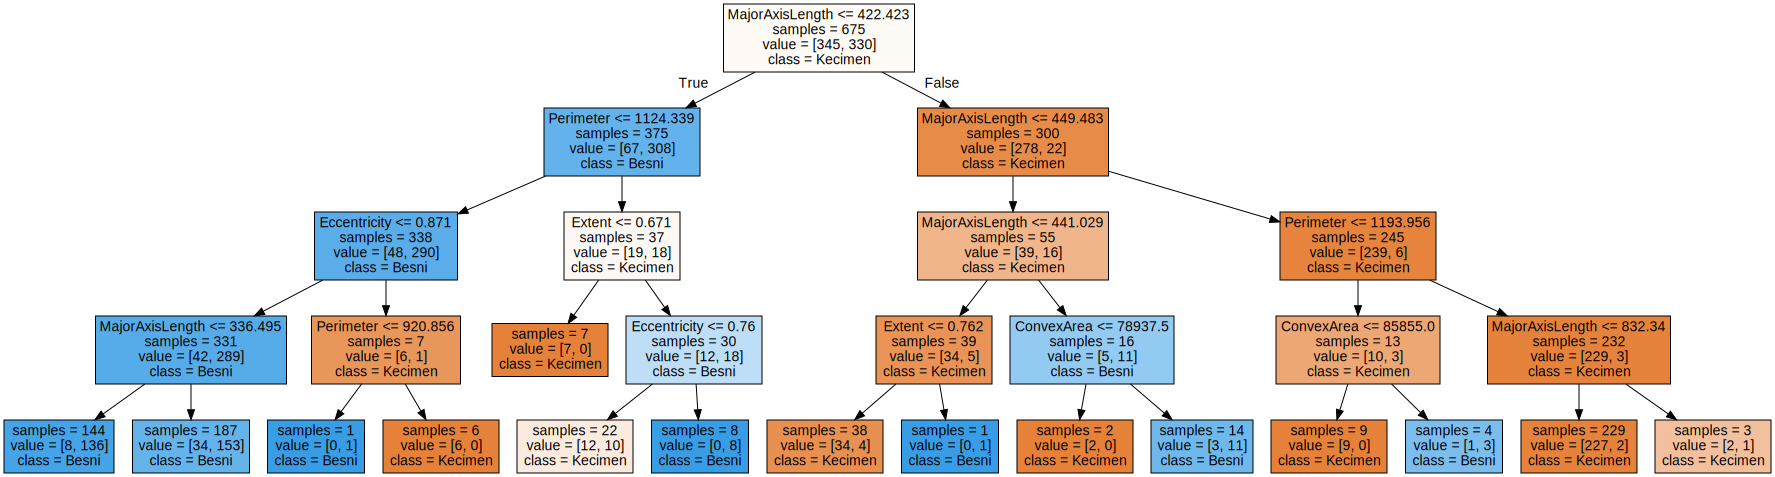

In [33]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [34]:
print("feature importances \n", tree.feature_importances_)

feature importances 
 [0.         0.85733426 0.         0.04557728 0.02226144 0.02382444
 0.05100258]


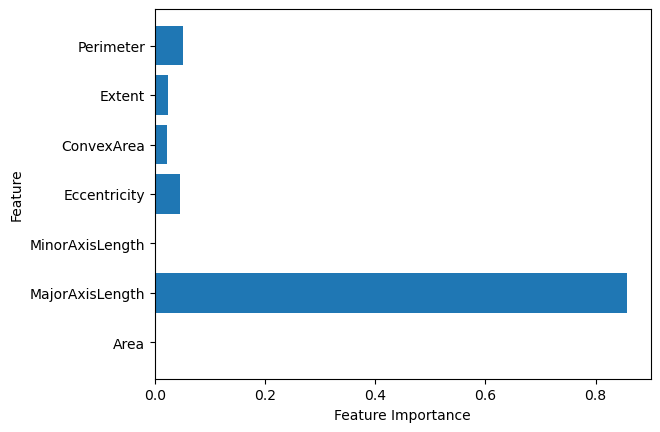

In [35]:
def plot_feature_importances_cancer(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


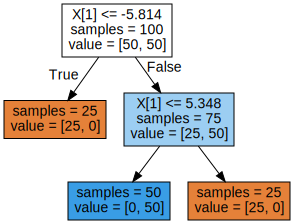

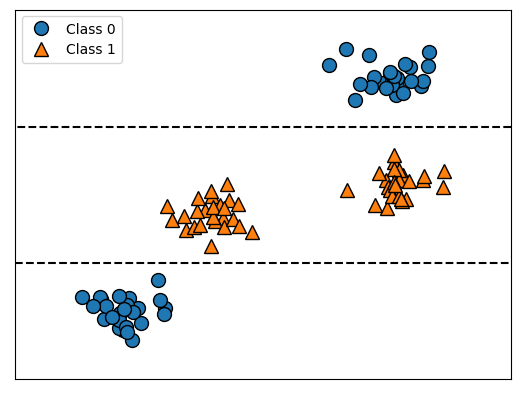

In [36]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

---
# Analyzing Random Forest

In [37]:
stock = pd.read_csv("Microsoft_Stock.csv")
stock.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [38]:
stock["Date"] = pd.to_datetime(stock["Date"])
stock["Date"] = stock['Date'].apply(lambda x: x.toordinal())

stock.shape

(1511, 6)

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

train = stock.iloc[:1000, :]
test = stock.iloc[1000:, :]

x_train = train["Date"].values.reshape(-1, 1)
y_train = train["Close"]

tree = DecisionTreeRegressor().fit(x_train, y_train)
linear_reg = LinearRegression().fit(x_train, y_train)

x_all = stock['Date'].values.reshape(-1, 1)

pred_tree = tree.predict(x_all)
pred_lr = linear_reg.predict(x_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

x, y = make_moons(n_samples = 100, noise=0.25, random_state=3)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

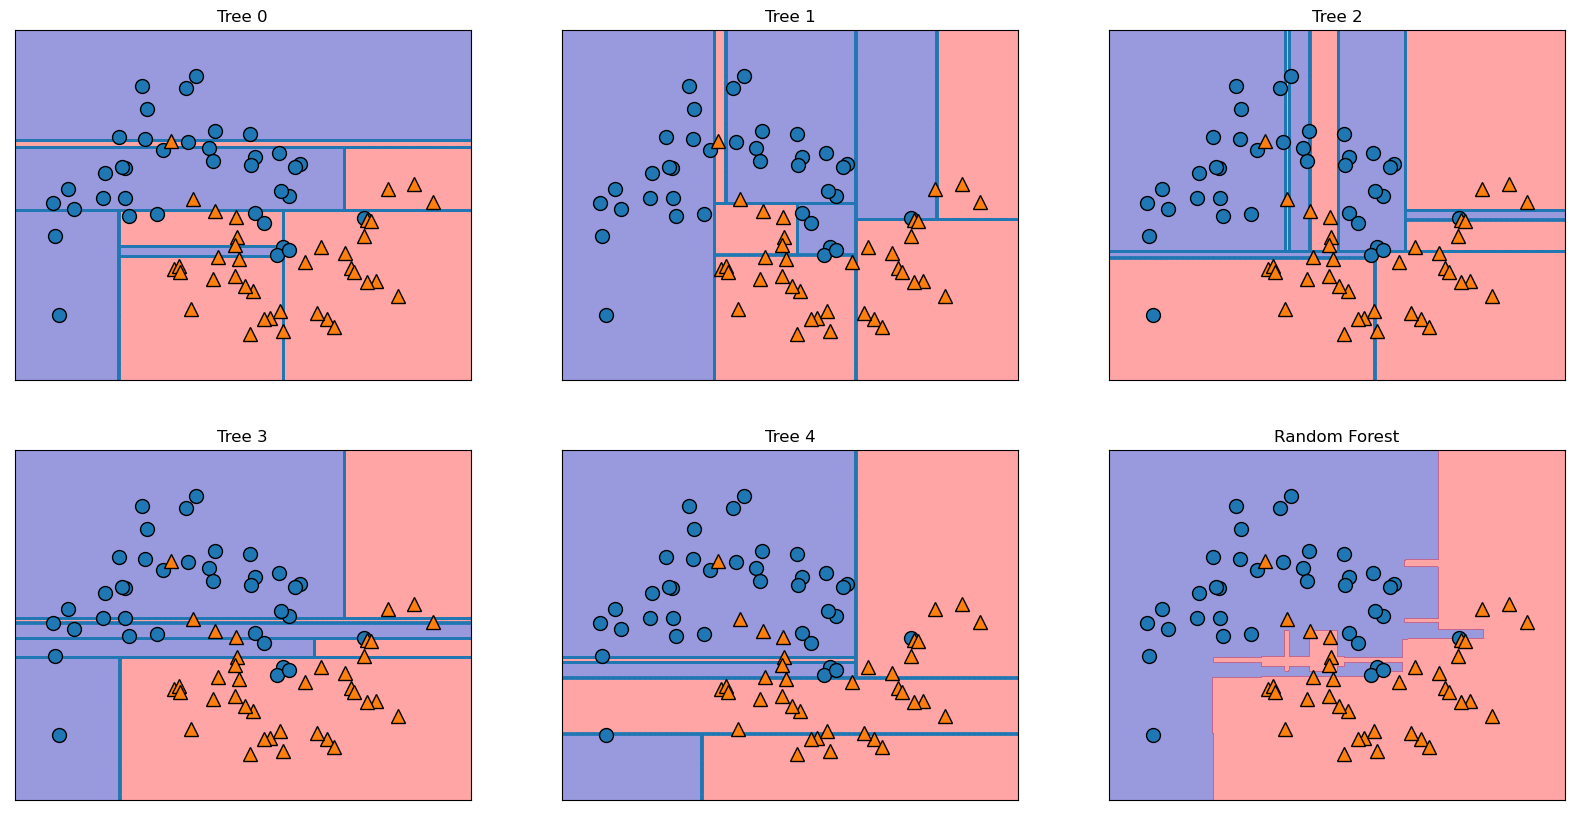

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(x_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, x_train[:, [0, 1]], fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)

In [42]:
raisin = pd.read_excel("Raisin_Dataset.xlsx")
raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


Accuracy on training set: 1.000
Accuracy on test set: 0.862


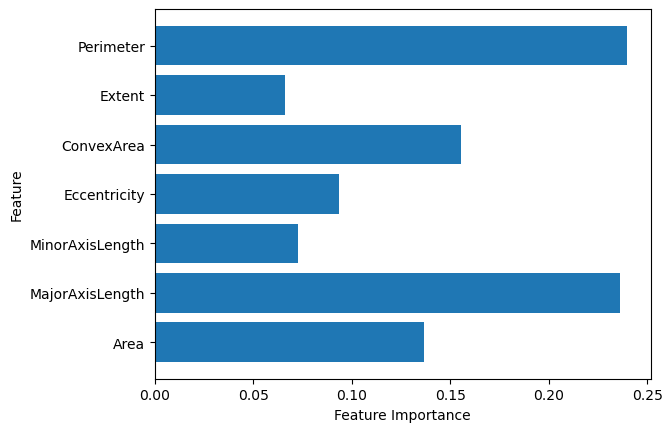

In [43]:
x = raisin.iloc[:, :-1]
y = raisin["Class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))
plot_feature_importances_cancer(forest)

### Kesimpulan

Dataset yang digunakan dalam modul kali ini adalah dataset harga saham Microsoft dan juga dataset Raisin. 

**Dataset Microsoft Stock Price**
- Untuk masalah regresi
- Digunakan pada algoritma Linear Regression dan Decision Tree Regressor
- Target prediksi: Harga closing saham pada waktu tertentu 

**Dataset Raisin**
- Untuk masalah klasifikasi
- Digunakan pada algoritma Decision Tree Classifier dan Random Forest Classifier
- Target prediksi: Kolom Class

In [44]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Obie Krisnanto
NIM: 	00000054153
Time-stamp:	2023-03-15 22:14:46.775251


In [1]:
!jupyter nbconvert --to html "./IF540_kelas_E_laporan_M05_00000054153_Obie_Krisnanto.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_kelas_E_laporan_M05_00000054153_Obie_Krisnanto.ipynb to html
[NbConvertApp] Writing 1631931 bytes to IF540_kelas_E_laporan_M05_00000054153_Obie_Krisnanto.html
